# 💧 Predição da Área Irrigada por Ângulo com Regressão Linear
### Análise e modelagem dos dados de irrigação para prever a área coberta com base nas horas de irrigação

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## Carregar e Visualizar os Dados


In [28]:
# Carregar os dados de irrigação a partir de um arquivo CSV

df_irrigation = pd.read_csv('./Dataset/dados_de_irrigacao.csv')

In [29]:
# Checar estrutura dos dados
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


## EDA

In [30]:
# Medidas estatisticas das variáveis
df_irrigation.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

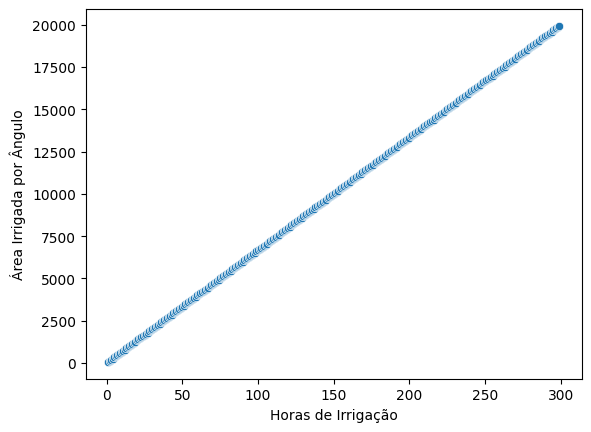

In [31]:
# Plot de dispersão
# X = horas de irrigação
# y = área irrigada por ângulo
sns.scatterplot(x='Horas de Irrigação', y='Área Irrigada por Ângulo', data=df_irrigation)


<Axes: ylabel='Área Irrigada por Ângulo'>

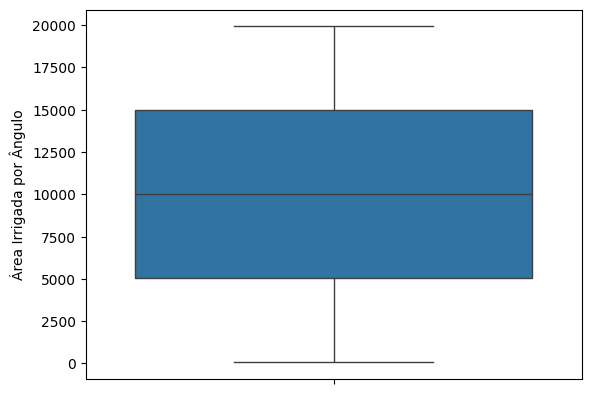

In [32]:
# Verificando outliers
sns.boxplot(df_irrigation, y='Área Irrigada por Ângulo')

<Axes: >

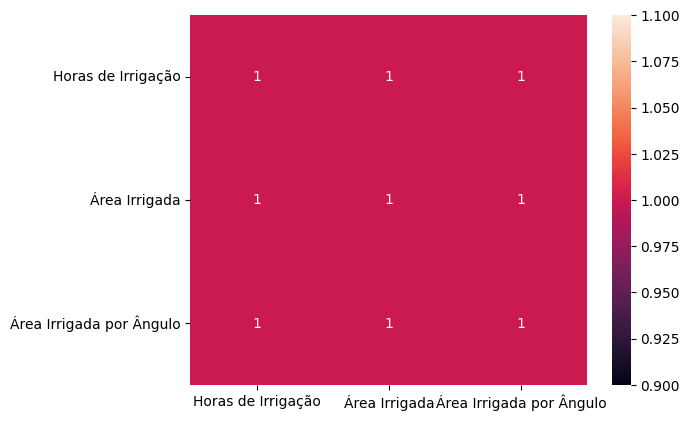

In [33]:
# Verificar correlação (Spearman)
sns.heatmap(df_irrigation.corr(method='spearman'), annot=True)

<Axes: xlabel='Horas de Irrigação', ylabel='Count'>

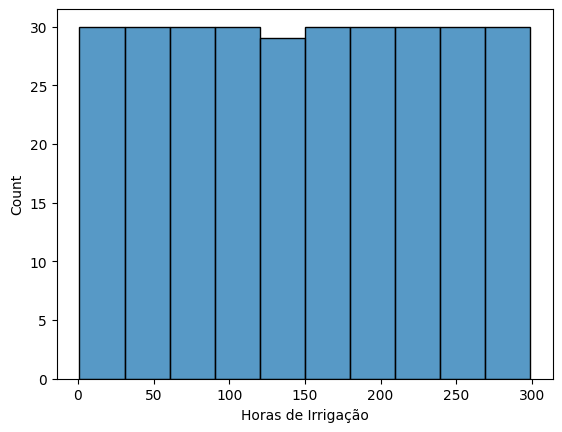

In [34]:
# Histograma das variáveis
sns.histplot(df_irrigation, x= 'Horas de Irrigação')

<Axes: xlabel='Área Irrigada por Ângulo', ylabel='Count'>

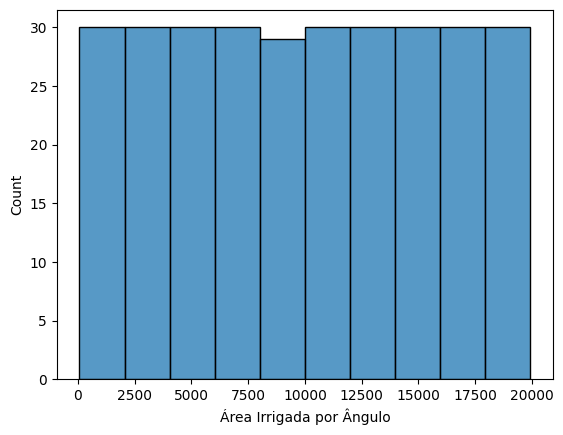

In [35]:
# Histograma das variáveis
sns.histplot(df_irrigation, x= 'Área Irrigada por Ângulo')

<Axes: xlabel='Área Irrigada', ylabel='Count'>

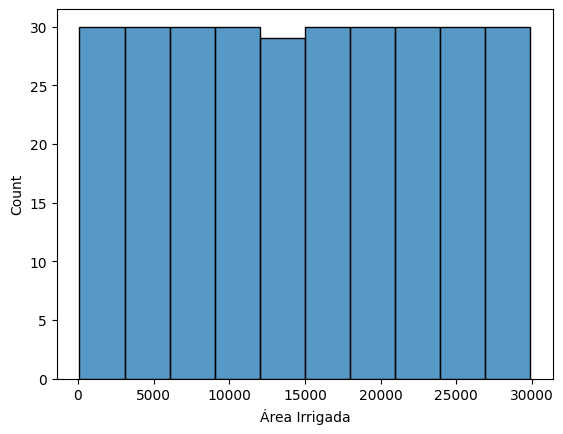

In [36]:
# Histograma das variáveis
sns.histplot(df_irrigation, x= 'Área Irrigada')

## Treinando Modelo

In [37]:
# Dividir o dataset em conjunto de treino e teste
X = df_irrigation[['Horas de Irrigação']].values.reshape(-1, 1)
y = df_irrigation['Área Irrigada por Ângulo'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [39]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Imprimir equação da reta
a = reg_model.coef_[0][0]
b = reg_model.intercept_[0]
print(f"A equação da reta é: y = {a:.4f}x + {b:.4f}")

A equação da reta é: y = 66.6667x + 0.0000


### Validando Modelo - Métricas

In [41]:
# Predição dos valores com base no conjunto de teste
y_pred = reg_model.predict(X_test)

In [42]:
# Calcular métrica R² ou coeficiente de determinação
# R² representa a proporção da variação total da variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

1.0

In [43]:
# Calcular métrica MAE (Mean absolute error)
mean_absolute_error(y_test, y_pred)


2.5402692295352205e-12

In [44]:
# Calcular métrica MSE (Mean Squared Error)
mean_squared_error(y_test, y_pred)

8.179466345344236e-24

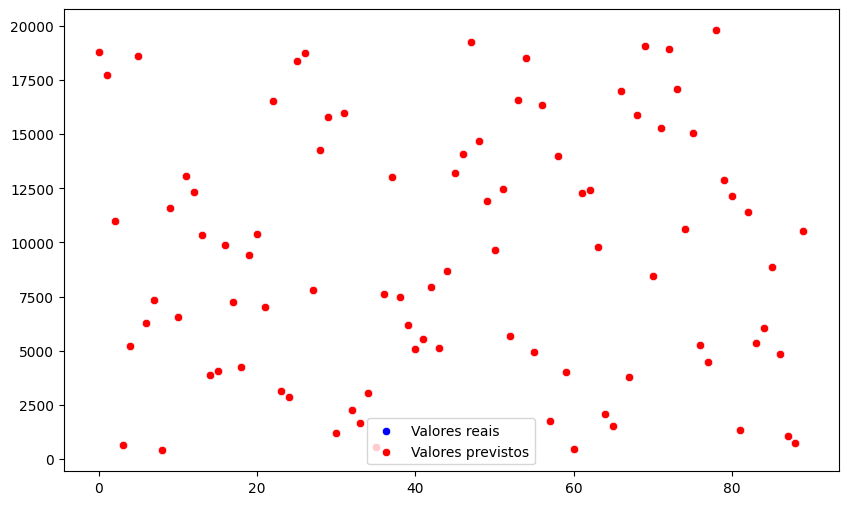

In [45]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color= 'blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color= 'red', label='Valores previstos')
plt.legend()
plt.show()

In [46]:
# Calcular resíduos
residuos = y_test - y_pred

In [47]:
# Calcular residuos padronizados
from scipy.stats import zscore
residuos_std = zscore(residuos)

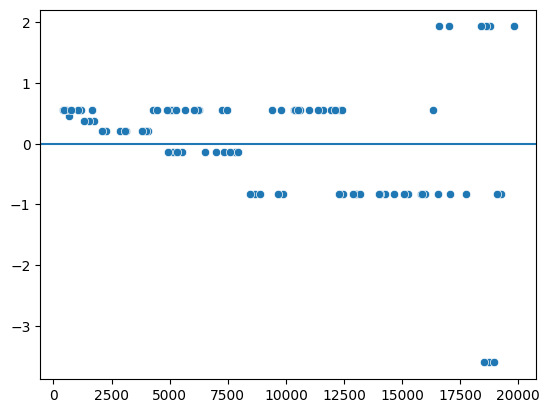

In [48]:
# Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e 2, o modelo é linear
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuos na escala padrão')

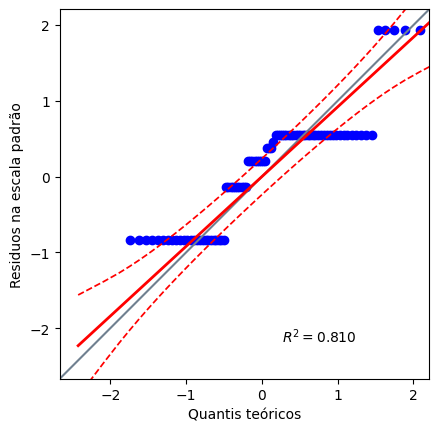

In [49]:
# Checar se resíduos seguem uma distribuição normal
# QQ-Plot (Quantile-Quantile Plot), avalia se uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Residuos na escala padrão')

In [50]:
# Teste de Shapiro-Wilk (Normalidade)
# H0: Os dados seguem uma distribuição normal (Hipotese nula)
# H1: Os dados não seguem uma distribuição normal (Hipotese alternativa)
# Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("estátistica do teste: {} e p-valor: {}".format(stat_shapiro, p_valor_shapiro))
if p_valor_shapiro > 0.05:
    print("Os dados seguem uma distribuição normal")

estátistica do teste: 0.8157937984211046 e p-valor: 3.1238198244908323e-09


In [51]:
# Teste de Kolmogorov-Smirnov (Normalidade)
# H0: Os dados seguem uma distribuição normal (Hipotese nula)
# H1: Os dados não seguem uma distribuição normal (Hipotese alternativa)
# Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)
stats_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("estátistica do teste: {} e p-valor: {}".format(stats_ks, p_valor_ks))
if p_valor_ks > 0.05:
    print("Os dados seguem uma distribuição normal")

estátistica do teste: 0.5 e p-valor: 2.4869515015725976e-21


### Predições com o modelo

In [52]:
# Área irrigada por ângulo para 15 horas de irrigação
reg_model.predict([[15]])

array([[1000.]])

# Para 15 horas de irrigação, o modelo prevê 1000 m² de área irrigada por ângulo
#### Essa estimativa é baseada em um modelo de regressão linear treinado com dados reais de irrigação, onde a variável independente é o tempo de irrigação (em horas) e a variável dependente é a área irrigada ajustada ao ângulo de cobertura (em m²).